In [9]:
pip install cartopy


     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     -------------------- ----------------- 30.7/56.0 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 419.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 991.0 kB/s eta 0:00:11
   ---------------------------------------- 0.1/10.9 MB 1.5 MB/s eta 0:00:08
    --------------------------------------- 0.2/10.9 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.9 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.9 MB 2.1 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.9 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/10.9 MB 2.1 MB/s eta 0:00:05
   --- ----

In [3]:
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
file_path = "D:\\data.nc"
dataset = nc.Dataset(file_path)
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2024-05-30 06:15:10 GMT by grib_to_netcdf-2.24.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/tmp/0ace1c60-483f-41db-adbc-b11c2d572e8a-adaptor.mars.internal-1717049710.0237663-14670-2-tmp.nc /cache/tmp/0ace1c60-483f-41db-adbc-b11c2d572e8a-adaptor.mars.internal-1717049655.2270896-14670-1-tmp.grib
    dimensions(sizes): longitude(21), latitude(21), expver(2), time(124)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 expver(expver), int32 time(time), int16 src(time, expver, latitude, longitude), int16 skt(time, expver, latitude, longitude)
    groups: 


In [15]:
pip install basemap

   ---------------------------------------- 0.0/507.3 kB ? eta -:--:--
   -- ------------------------------------ 30.7/507.3 kB 660.6 kB/s eta 0:00:01
   ------ --------------------------------- 81.9/507.3 kB 1.2 MB/s eta 0:00:01
   ------- ------------------------------- 92.2/507.3 kB 871.5 kB/s eta 0:00:01
   ----------------- ---------------------- 225.3/507.3 kB 1.4 MB/s eta 0:00:01
   -------------------------- ------------- 337.9/507.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  501.8/507.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 507.3/507.3 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.5 MB ? eta -:--:--
   ---------------------------------------- 0.2/30.5 MB 4.6 MB/s eta 0:00:07
    --------------------------------------- 0.5/30.5 MB 5.0 MB/s eta 0:00:06
   - -------------------------------------- 0.8/30.5 MB 6.1 MB/s eta 0:00:05
   - -------------------------------------- 1.0/30.5 MB 5.5 MB/s eta 

TypeError: Invalid shape (2, 21, 21) for image data

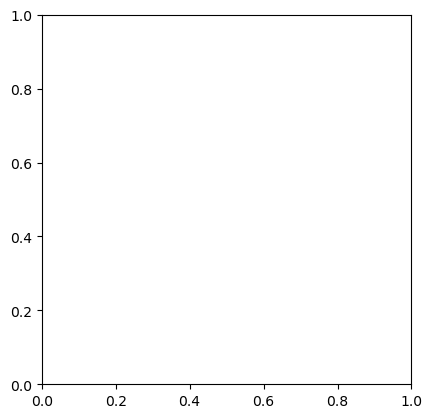

In [7]:
#读取src
variable_name = "src"
variable  =  dataset.variables[variable_name][:]

data = variable[0,:,:]

plt.imshow(data,cmap="jet")
plt.colorbar()
plt.show()

[[[[273.38952562209533 273.3779392153661 273.46020270314375
    273.49496192333146 273.4700511488636 273.4758443522282
    273.50133444703255 273.49496192333146 273.3976361068058
    273.40516727117983 273.52276929948164 273.4833755166022
    273.3037862122989 273.24121961596103 273.25512330403615
    273.2864066022051 273.29625504792494 273.3078414546542
    273.22384000586715 273.44629901506863 273.8020017016564]
   [273.49496192333146 273.48569279794805 273.5459421129401
    273.548259394286 273.6027155059134 273.51465881477117
    273.49496192333146 273.50712765039714 273.5696942467351
    273.5754874500997 273.548259394286 273.5969223025488
    273.55752851966935 273.55173531630476 273.46425794549896
    273.4115397948809 273.3918429034412 273.3646148476275
    273.33101426811265 273.3431799951784 273.14736972145414]
   [273.755076754403 273.64964045316685 273.5540525976506
    273.5772254111091 273.70409656479427 273.6258883193719
    273.42312620161016 273.5459421129401 273.6415

TypeError: Dimensions of C (2, 21, 21) should be one smaller than X(21) and Y(21) while using shading='flat' see help(pcolor)

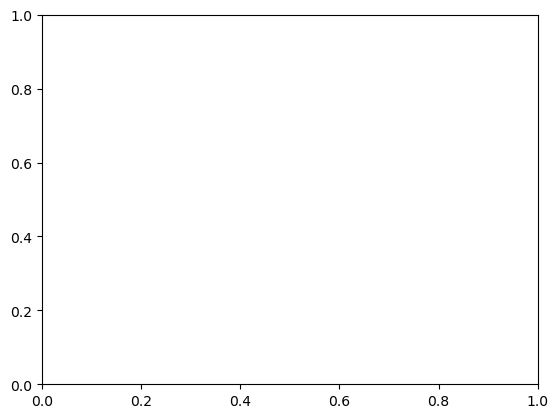

In [20]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

meteo_file = "D:\\data.nc"
fh = Dataset(meteo_file, mode='r')

# 获取每个变量的值
lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]
tlml = fh.variables['skt'][:]



tlml_units = fh.variables['skt'].units


# 经纬度平均值
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(lat_0=lat_0, lon_0=lon_0)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
# 这里我的tlml数据是24小时的，我这里只绘制第1小时的（tlml_0）
tlml_0 = tlml[0:1:, ::, ::]

print(tlml_0)

cs = m.pcolor(xi, yi, np.squeeze(tlml_0))

# Add Grid Lines
# 绘制经纬线
m.drawparallels(np.arange(35., 38., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(115., 119., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(tlml_units)

# Add Title
plt.title('Surface Air Temperature')
plt.show()

fh.close()